In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon

from astropy.table import Table

# Plotting Functions

### Upper left

In [2]:
def plot_first_selection(df):
    """Plot spatial distribution of stars selected based on Proper Motion
    
    df: Tale or DataFrame with proper motion selected coordinates in GD-1 reference frame
    """
    x = df['phi1']
    y = df['phi2']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlabel('$\phi_1$ [deg]')
    plt.ylabel('$\phi_2$ [deg]')
    plt.title('Proper motion selection', fontsize='medium')

    plt.axis('equal')

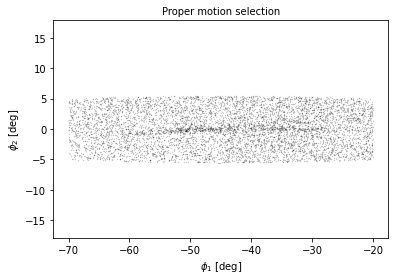

In [3]:
filename_pm_selected = 'gd1_candidates.hdf5'
candidate_df = pd.read_hdf(filename_pm_selected, 'candidate_df')
plot_first_selection(candidate_df)

### Upper right

In [4]:
def plot_proper_motion(df):
    """Plot proper motion of spatially selected stars in GD-1
    
    df: Table or DataFrame with spatially selected proper motions in GD-1 reference frame
    """
    pm1 = df['pm_phi1']
    pm2 = df['pm_phi2']

    plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)
    
    poly = Polygon(vertices, closed=True, 
                   facecolor='C1', alpha=0.4)
    plt.gca().add_patch(poly)
    
    plt.xlabel('$\mu_{\phi_1} [\mathrm{mas~yr}^{-1}]$')
    plt.ylabel('$\mu_{\phi_2} [\mathrm{mas~yr}^{-1}]$')

    plt.xlim(-12, 8)
    plt.ylim(-10, 10)

In [5]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

pm1_rect = [pm1_min, pm1_min, pm1_max, pm1_max]
pm2_rect = [pm2_min, pm2_max, pm2_max, pm2_min]

In [6]:
vertices = np.transpose([pm1_rect, pm2_rect])

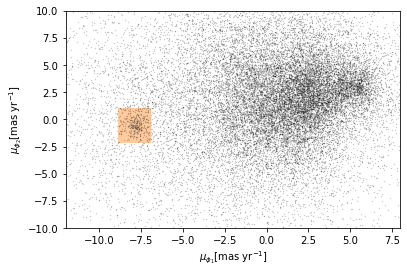

In [7]:
filename_pm = 'gd1_dataframe.hdf5'
centerline = pd.read_hdf(filename_pm, 'centerline')
plot_proper_motion(centerline)

### Lower left

In [8]:
def plot_second_selection(df):
    """Plot spatial distribution of photometry selected points
    
    df: Table or DataFrame with photometry selected positions in GD1 reference frame
    """
    x = df['phi1']
    y = df['phi2']

    plt.plot(x, y, 'ko', markersize=0.7, alpha=0.9)

    plt.xlabel('$\phi_1$ [deg]')
    plt.ylabel('$\phi_2$ [deg]')
    plt.title('Proper motion + photometry selection', fontsize='medium')

    plt.axis('equal')

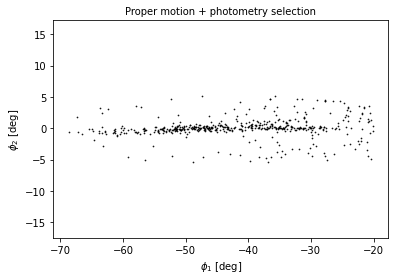

In [9]:
filename = 'gd1_merged.hdf5'
selected = pd.read_hdf(filename, 'selected')
plot_second_selection(selected)

### Lower right

In [10]:
def plot_cmd(table):
    """Plot a color magnitude diagram.
    
    table: Table or DataFrame with photometry data
    """
    y = table['g_mean_psf_mag']
    x = table['g_mean_psf_mag'] - table['i_mean_psf_mag']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlim([0, 1.5])
    plt.ylim([14, 22])
    plt.gca().invert_yaxis()

    plt.ylabel('$g_0$')
    plt.xlabel('$(g-i)_0$')

In [11]:
filename_poly = 'gd1_polygon.hdf5'
coords_df = pd.read_hdf(filename_poly, 'coords_df')
coords = coords_df.to_numpy()

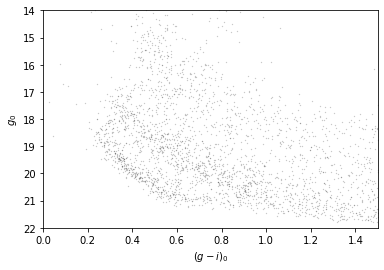

In [12]:
merged = pd.read_hdf(filename, 'merged')
plot_cmd(merged)